In [4]:
# %pip install sklearn

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Gaussian Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Generate a classification report
report = classification_report(y_test, y_pred, target_names=iris.target_names)
print("Classification Report:")
print(report)

# Predicting probability for the test set
# print("Prediction probabilities for test set:")
# probabilities = model.predict_proba(X_test)
# for i, probs in enumerate(probabilities):
    # print(f"Sample {i}: {probs}")

Accuracy: 97.78%
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



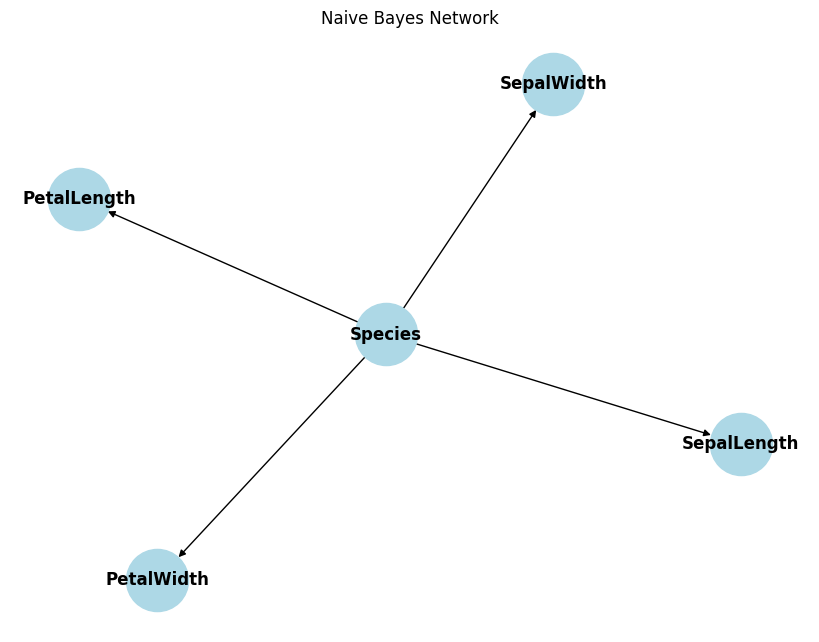

In [2]:
# %pip install pgmpy
# %pip install matplotlib
# %pip install networkx

from pgmpy.models import NaiveBayes
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination
import matplotlib.pyplot as plt
import networkx as nx

# Create a Naive Bayes model
model = NaiveBayes()

# Define the structure of the Naive Bayes model
# 'Species' is the target, and the features are 'SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'
model.add_edges_from([('Species', 'SepalLength'), 
                      ('Species', 'SepalWidth'), 
                      ('Species', 'PetalLength'), 
                      ('Species', 'PetalWidth')])

# Create a networkx graph from the edges of the Naive Bayes model
G = nx.DiGraph()
G.add_edges_from(model.edges())

# Visualize the model using networkx
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_size=2000, node_color='lightblue', font_size=12, font_weight='bold')
plt.title('Naive Bayes Network')
plt.show()

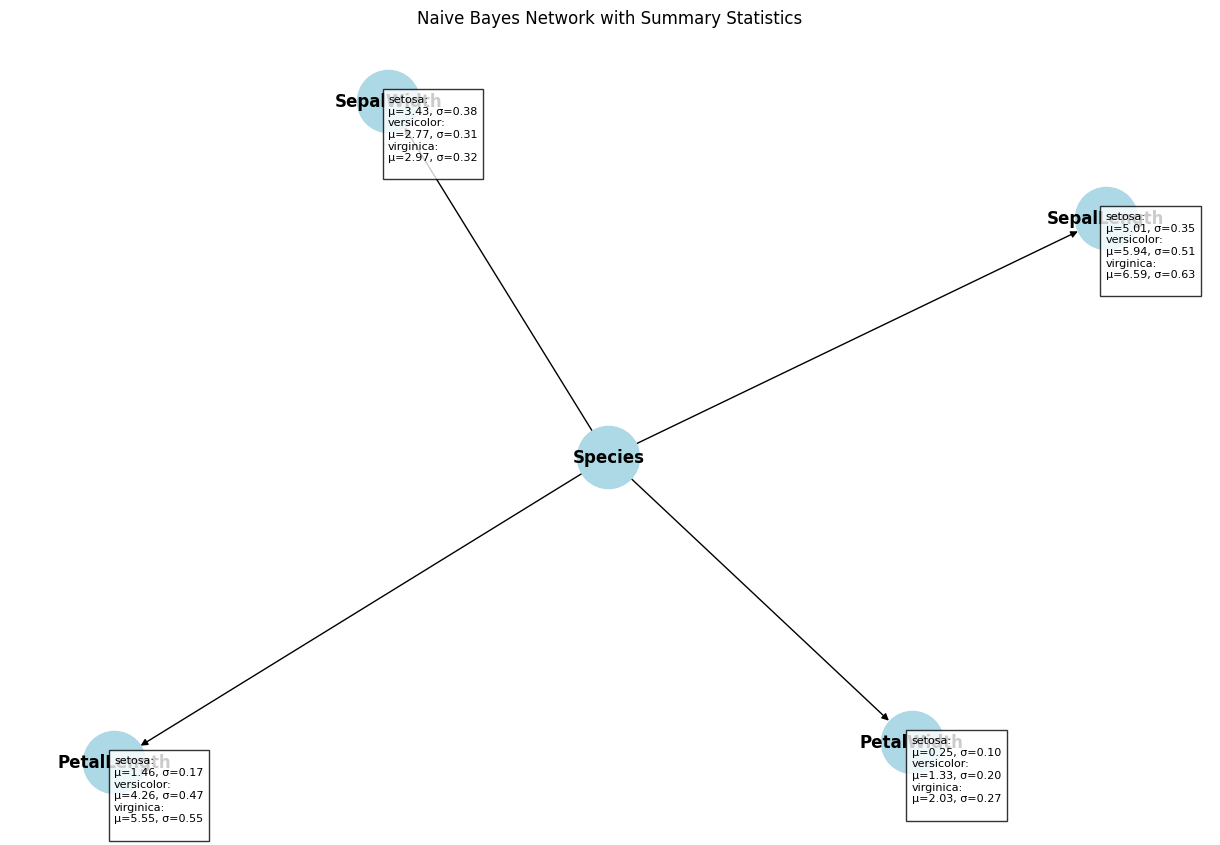

In [4]:
import matplotlib.pyplot as plt
import networkx as nx
from pgmpy.models import NaiveBayes
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
import numpy as np

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Fit a Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X, y)

# Extract the mean and standard deviation from the model
means = gnb.theta_  # Mean of each feature per class
std_devs = np.sqrt(gnb.var_)  # Standard deviation of each feature per class

# Create a Naive Bayes model using pgmpy
model = NaiveBayes()
model.add_edges_from([('Species', 'SepalLength'), 
                      ('Species', 'SepalWidth'), 
                      ('Species', 'PetalLength'), 
                      ('Species', 'PetalWidth')])

# Create a networkx graph from the edges of the Naive Bayes model
G = nx.DiGraph()
G.add_edges_from(model.edges())

# Define a layout for the nodes
pos = nx.spring_layout(G)

# Visualize the model using networkx
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=12, font_weight='bold', arrows=True)

# Annotate nodes with summary statistics
features = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
species = iris.target_names

for i, feature in enumerate(features):
    annotation = ""
    for j, specie in enumerate(species):
        annotation += f"{specie}:\nμ={means[j, i]:.2f}, σ={std_devs[j, i]:.2f}\n"
    plt.text(pos[feature][0], pos[feature][1]-0.2, annotation, fontsize=8, bbox=dict(facecolor='white', alpha=0.8))

plt.title('Naive Bayes Network with Summary Statistics')
plt.show()